Vitor Albuquerque de Paula

# Considere o seguinte arquivo textual:
   [20 Newsgroups Dataset](https://www.kaggle.com/crawford/20-newsgroups)

## Escolha 2 tópicos dentre os 20 disponíveis no dataset e faça download dos mesmos.




In [ ]:
!pip install nltk

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import pandas as pd

def read_data(file_path, label):
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
        lines = file.readlines()

    # Criar o DataFrame com cada linha como um documento
    data = pd.DataFrame({'text': lines, 'label': [label] * len(lines)})
    return data



# Concatenar os datasets
data_space = read_data('sci.space.txt', 1)
data_atheism = read_data('alt.atheism.txt', 2)
data = pd.concat([data_space, data_atheism])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ealbvit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Gere um Bag of words: Leia o texto e armazene cada palavra em uma posição em um vetor. Faça a contagem da frequência de cada palavra gerando uma matriz termo-frequência. Na última coluna armazene o rótulo do texto ('1' = textos do tópico 1 e '2' = textos do tópico 2)

| Story | based | premise | congress | ... | work | versions | make | sure | Rótulo |
|-------|-------|---------|----------|-----|------|----------|------|------|--------|
| 1     | 2     | 0       | 3        | ... | 0    | 0        | 0    | 0    | 1      |
| 0     | 0     | 0       | 0        | ... | 1    | 5        | 0    | 1    | 2      |
| ...   | ...   | ...     | ...      | ... | ...  | ...      | ...  | ...  | ...    |

## Remova os stop words (palavras irrelevantes):
   [Stop Words List](https://gist.github.com/sebleier/554280)

In [2]:
# Bag of Words com remoção de stop words
vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(data['text'])  # Acessando a coluna de texto pelo nome
y = data['label']


## Escolha dois algoritmos de classificação vistos anteriormente (knn, naive bayes, árvore de decisão, svm, etc) e classifique os textos (separar 70% para treino e 30% para teste). Anexar a saída e % de acerto de cada algoritmo. Pode usar algoritmos de classificação de bibliotecas.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Verificar a distribuição dos rótulos
print("Distribuição dos rótulos:", y.value_counts())

# Dividir os dados com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Treino e avaliaçao os modelos
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_accuracy = accuracy_score(y_test, nb_classifier.predict(X_test))

# RandomForest com jobs paralelos
rf_classifier = RandomForestClassifier(n_jobs=-1, verbose=2)
rf_classifier.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))

print("Naive Bayes Accuracy:", nb_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Distribuição dos rótulos: label
2    120487
1     87114
Name: count, dtype: int64
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min


building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.8min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    1.7s


Naive Bayes Accuracy: 0.8357123360254332
Random Forest Accuracy: 0.8734445497021563


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    8.7s finished


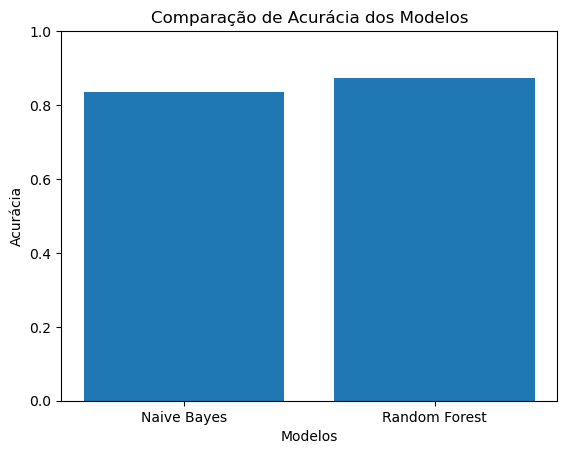

In [4]:
import matplotlib.pyplot as plt

accuracies = {'Naive Bayes': nb_accuracy, 'Random Forest': rf_accuracy}

plt.bar(accuracies.keys(), accuracies.values())
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia dos Modelos')
plt.ylim(0, 1)  # Acurácia varia entre 0 e 1
plt.show()


In [8]:
# Obtenha as probabilidades das palavras para cada classe
class_probabilities = nb_classifier.feature_log_prob_

# Obtenha os nomes das características (palavras)
feature_names = vectorizer.get_feature_names_out()

# Exiba as top N palavras para cada classe
N = 50
for i, class_probability in enumerate(class_probabilities):
    print(f"Top {N} words for class {i+1}:")
    # Ordenar as probabilidades e pegar os top N índices
    top_indices = class_probability.argsort()[-N:]
    for j in top_indices:
        print(f"{feature_names[j]}: {np.exp(class_probability[j])}")  # Converter log probabilidade de volta para probabilidade
    print("\n")


Top 50 words for class 1:
toronto: 0.0012948442958701266
well: 0.001316365253696224
two: 0.0013378862115223204
years: 0.0013450598641310183
long: 0.001384514953478862
use: 0.0013881017797832114
program: 0.0013916886060875609
high: 0.0013952754323919095
sky: 0.0014239700428267056
access: 0.001441904174348452
see: 0.0014562514795658493
spacecraft: 0.0014813592636962957
satellite: 0.0014921197426093432
pat: 0.0014921197426093432
know: 0.0015997245317398252
solar: 0.0015997245317398252
data: 0.0016068981843485233
people: 0.0016535269263050656
may: 0.001707329320870307
us: 0.001718089799783354
much: 0.0017539580628268489
new: 0.0017826526732616437
think: 0.0018041736310877396
mission: 0.0018830838097834257
system: 0.001929712551739968
get: 0.0019942754252182567
first: 0.002008622730435654
time: 0.0020265568619574023
henry: 0.0020588382986965466
could: 0.0021234011721748343
shuttle: 0.0021341616510878836
moon: 0.002141335303696582
orbit: 0.002227419135000967
gov: 0.0022668742243488107
launch